 Workshop 1: Håndtering af Manglende Data

 **Fag:** AI & Data, 2. Semester

 **Gruppemedlemmer:** Peter & Jonas

 **Dato:** 14-04-2025

 Trin 0: Import af Nødvendige Biblioteker

 Først importerer vi alle de Python-biblioteker, vi forventer at få brug for til dataindlæsning, manipulation, visualisering, imputering, modellering og databaseinteraktion. Dette inkluderer `pandas` til datahåndtering, `numpy` til numeriske operationer, `matplotlib` og `seaborn` til visualisering, `sklearn` til imputering og maskinlæring, samt `sqlite3` til databasehåndtering.


In [6]:
# Datahåndtering
import pandas as pd
import numpy as np

# Visualisering
import matplotlib.pyplot as plt
import seaborn as sns

# Imputering
from sklearn.impute import SimpleImputer, KNNImputer

# Preprocessing og Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score

# Database
import sqlite3

plt.style.use('seaborn-v0_8-whitegrid')

 Trin 1: Indlæsning af Datasæt

 Vi starter med at indlæse det valgte datasæt, `horse.csv`. Vi bruger `pandas`' `read_csv` funktion.


In [ ]:
# Definer filsti
file_path = 'horse.csv'

df_original = pd.read_csv(file_path)

print(f"Datasættet har {df_original.shape[0]} rækker og {df_original.shape[1]} kolonner.")

# Vis de første par rækker for at få et indtryk af data
print(df_original.head())

Datasættet har 299 rækker og 28 kolonner.
  surgery    age  hospital_number  rectal_temp  pulse  respiratory_rate  \
0      no  adult           530101         38.5   66.0              28.0   
1     yes  adult           534817         39.2   88.0              20.0   
2      no  adult           530334         38.3   40.0              24.0   
3     yes  young          5290409         39.1  164.0              84.0   
4      no  adult           530255         37.3  104.0              35.0   

  temp_of_extremities peripheral_pulse mucous_membrane capillary_refill_time  \
0                cool          reduced             NaN            more_3_sec   
1                 NaN              NaN   pale_cyanotic            less_3_sec   
2              normal           normal       pale_pink            less_3_sec   
3                cold           normal   dark_cyanotic            more_3_sec   
4                 NaN              NaN   dark_cyanotic            more_3_sec   

   ... packed_cell_volume 

Trin 2: Indledende Dataudforskning og Identifikation af Manglende Data

 Nu udforsker vi datasættet for at forstå dets struktur, datatyper og især omfanget og placeringen af manglende data.

 Vi vil bruge metoder som `info()`, `describe()`, `isnull().sum()` og visualiseringer.

In [ ]:
# Tjekker om DataFrame blev indlæst korrekt
print("Grundlæggende Information")
df_original.info()

print("\n Deskriptiv Statistik (Numeriske Kolonner)")
print(df_original.describe())

print("\n Deskriptiv Statistik (Kategoriske Kolonner)")
print(df_original.describe(include='object'))

print("\n Antal Manglende Værdier pr. Kolonne")
missing_counts = df_original.isnull().sum()
print(missing_counts[missing_counts > 0].sort_values(ascending=False))

print("\n Procentdel Manglende Værdier pr. Kolonne")
missing_percentage = (df_original.isnull().sum() / len(df_original)) * 100
print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))


--- Grundlæggende Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     1

Visualisering af Manglende Data

 Et heatmap er en effektiv måde visuelt at identificere mønstre i manglende data, som diskuteret i Lektion 5 om visualisering. Gule områder i heatmappet indikerer manglende værdier (NaN).


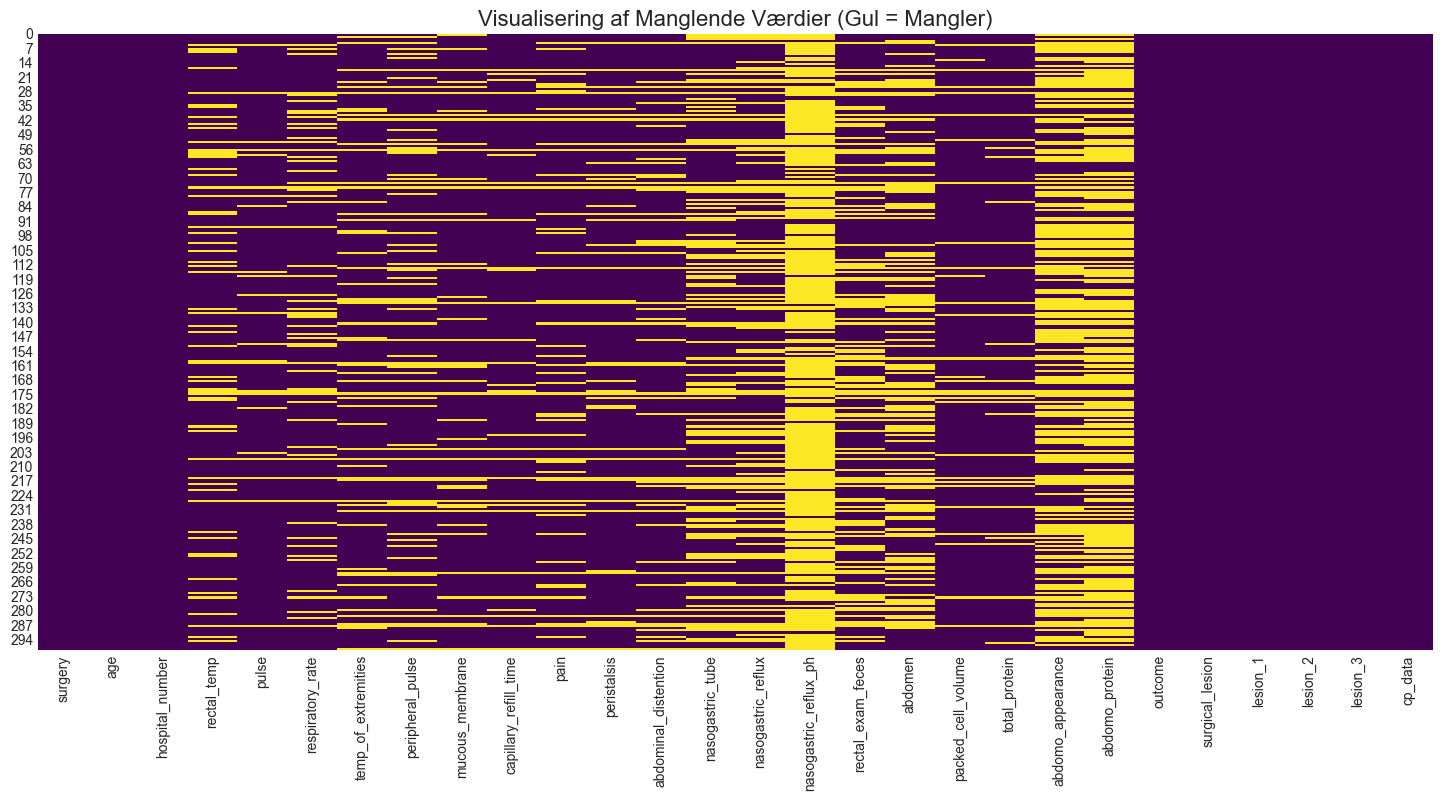


--- Procentdel Manglende Værdier pr. Kolonne (sorteret) ---
nasogastric_reflux_ph    82.274247
abdomo_protein           66.220736
abdomo_appearance        55.183946
abdomen                  39.464883
nasogastric_reflux       35.451505
nasogastric_tube         34.782609
rectal_exam_feces        34.113712
peripheral_pulse         23.076923
rectal_temp              20.066890
respiratory_rate         19.397993
temp_of_extremities      18.729097
abdominal_distention     18.729097
pain                     18.394649
mucous_membrane          15.719064
peristalsis              14.715719
total_protein            11.036789
capillary_refill_time    10.702341
packed_cell_volume        9.698997
pulse                     8.026756
dtype: float64


In [ ]:

plt.figure(figsize=(18, 8))
sns.heatmap(df_original.isnull(), cbar=False, cmap='viridis')
plt.title('Visualisering af Manglende Værdier (Gul = Mangler)', fontsize=16)
plt.show()

print("\n Procentdel Manglende Værdier pr. Kolonne (sorteret)")
print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))



 Trin 2.1: Diskussion af Typer af Datamangel (MCAR, MAR, NMAR)

 Baseret på materialet fra Lektion 3, skal vi nu forsøge at identificere de sandsynlige typer af datamangel i vores datasæt. Dette er ofte en udfordring uden dybdegående domæneviden, men vi kan lave kvalificerede gæt baseret på mønstrene og kolonnebeskrivelser.

 *   **MCAR (Missing Completely At Random):** Sandsynligheden for at en værdi mangler er helt uafhængig af både observerede og uobserverede værdier. Dette kunne skyldes tilfældige tastefejl, midlertidige udstyrsfejl, eller at en prøve ved et uheld blev tabt. Små mængder manglende data i ellers velindsamlede kolonner *kan* være MCAR.
 *   **MAR (Missing At Random):** Sandsynligheden for at en værdi mangler afhænger *kun* af andre *observerede* værdier i datasættet, men ikke af den manglende værdi selv. F.eks. hvis et bestemt spørgsmål i en survey oftere springes over af en bestemt aldersgruppe (som er observeret).
 *   **NMAR (Not Missing At Random):** Sandsynligheden for at en værdi mangler afhænger af selve den manglende værdi (eller andre uobserverede faktorer). F.eks. hvis personer med meget høj indkomst er mindre tilbøjelige til at oplyse den. Dette er den sværeste type at håndtere korrekt.

 Datasættet indeholder sandsynligvis en blanding af MAR og NMAR, især for kolonner med høj mangelrate. Der kan også være MCAR-elementer. Den høje grad af mangel i visse kolonner antyder, at simple imputationsmetoder (som gennemsnit/median) kan skabe betydelig bias, især hvis data er NMAR. For denne øvelse vil vi dog fortsætte med at inkludere de fleste kolonner for at demonstrere imputeringsteknikkerne, men i et reelt projekt ville en dybere analyse og evt. fjernelse af kolonner med ekstrem mangel være nødvendig.


Trin 2.2: Identifikation af Kolonnetyper

 For at kunne anvende passende imputationsstrategier (f.eks. median for numeriske, modus for kategoriske), adskiller vi kolonnerne baseret på deres formodede datatype (`float64`/`int64` for numeriske, `object` for kategoriske).

In [12]:
df = df_original.copy()

cols_to_convert = ['packed_cell_volume', 'total_protein', 'abdomo_protein', 'nasogastric_reflux_ph']

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    print(f"Kolonne '{col}' konverteret til {df[col].dtype}.")

numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

missing_cols = df.columns[df.isnull().any()].tolist()
numeric_cols_missing = [col for col in numeric_cols if col in missing_cols]
categorical_cols_missing = [col for col in categorical_cols if col in missing_cols]



Kolonne 'packed_cell_volume' konverteret til float64.
Kolonne 'total_protein' konverteret til float64.
Kolonne 'abdomo_protein' konverteret til float64.
Kolonne 'nasogastric_reflux_ph' konverteret til float64.


Trin 3: Data Preprocessing for Imputering og Modellering

 Før vi kan anvende visse imputeringsteknikker (som KNNImputer) og træne klassifikationsmodeller, skal vi forberede data yderligere:

 1.  **Håndtering af kategoriske features:** De fleste algoritmer kræver numerisk input. Vi anvender `LabelEncoder` til at konvertere kategoriske strenge til heltal. Vi er opmærksomme på, at dette indfører en arbitrær orden, hvilket kan være problematisk for nogle modeller, men det er en simpel start. One-Hot Encoding ville være et alternativ for nominale variable uden orden.
 2.  **Definition af Features (X) og Target (y):** Vi vælger `outcome` som vores target-variabel (det vi vil forudsige). Resten af kolonnerne (undtagen irrelevante ID'er som `hospital_number`) bliver vores features (X).
 3.  **Opdeling i Trænings- og Testsæt:** Dette er *essentielt* og skal gøres *før* imputering. Vi bruger `train_test_split` til at opdele data, så vi kan træne vores imputere og modeller på træningssættet og evaluere dem på et uset testsæt. Dette forhindrer data leakage, hvor information fra testsættet utilsigtet påvirker træningen. Vi bruger `stratify=y` for at sikre, at fordelingen af `outcome`-klasserne er ens i trænings- og testsættet.


In [ ]:
if 'df' in locals():
    # --- 1. Håndtering af kategoriske features (Label Encoding) ---
    print("--- Anvender Label Encoding på kategoriske kolonner ---")
    df_processed = df.copy()
    label_encoders = {}

    for col in categorical_cols:
        df_processed[col] = df_processed[col].fillna('Missing_Category').astype(str)
        le = LabelEncoder()
        le.fit(df_processed[col].unique())
        df_processed[col] = le.transform(df_processed[col])
        label_encoders[col] = le

    print("\n--- Datatyper efter Label Encoding ---")
    df_processed.info()

    # --- 2. Definition af Features (X) og Target (y) ---
    target_col = 'outcome'
    y = df_processed[target_col]
    cols_to_drop = [target_col, 'hospital_number', 'lesion_1', 'lesion_2', 'lesion_3']
    X = df_processed.drop(columns=cols_to_drop)
    feature_names = X.columns.tolist()
    print(f"\nFeatures (X) defineret med {X.shape[1]} kolonner.")
    print(f"Target (y) defineret for kolonne '{target_col}'.")

    # --- 3. Opdeling i Trænings- og Testsæt ---
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    print("\n--- Data opdelt i træning og test ---")
    print(f"X_train shape: {X_train.shape}")
    print(f"X_test shape: {X_test.shape}")
    print(f"y_train shape: {y_train.shape}")
    print(f"y_test shape: {y_test.shape}")

else:
    print("DataFrame 'df' blev ikke initialiseret korrekt.")

--- Anvender Label Encoding på kategoriske kolonner ---
Kolonne 'surgery' label-encoded. Ingen manglende værdier fundet; placeholder 'Missing_Category' blev ikke brugt.
Kolonne 'age' label-encoded. Ingen manglende værdier fundet; placeholder 'Missing_Category' blev ikke brugt.
Kolonne 'temp_of_extremities' label-encoded. Placeholder 'Missing_Category' er nu 0.
Kolonne 'peripheral_pulse' label-encoded. Placeholder 'Missing_Category' er nu 0.
Kolonne 'mucous_membrane' label-encoded. Placeholder 'Missing_Category' er nu 0.
Kolonne 'capillary_refill_time' label-encoded. Placeholder 'Missing_Category' er nu 1.
Kolonne 'pain' label-encoded. Placeholder 'Missing_Category' er nu 0.
Kolonne 'peristalsis' label-encoded. Placeholder 'Missing_Category' er nu 0.
Kolonne 'abdominal_distention' label-encoded. Placeholder 'Missing_Category' er nu 0.
Kolonne 'nasogastric_tube' label-encoded. Placeholder 'Missing_Category' er nu 0.
Kolonne 'nasogastric_reflux' label-encoded. Placeholder 'Missing_Categor

Trin 4: Imputationsmetode 1: SimpleImputer (Median/Modus)

 Vores første imputationsmetode er `SimpleImputer` fra `scikit-learn`. Denne metode er en basal tilgang, som beskrevet i Lektion 3. Vi vælger følgende strategier:
 *   **Median:** For numeriske kolonner. Medianen er mere robust over for outliers end middelværdien.
 *   **Modus (Most Frequent):** For de kolonner, der oprindeligt var kategoriske (nu label-encoded). Modus er den mest passende simple strategi for kategoriske data.

 **Vigtigt:** Vi fitter imputeringsmodellerne *udelukkende* på træningsdata (`X_train`) for at undgå data leakage. Derefter bruger vi de fittede modeller til at transformere både trænings- og testdata (`X_train` og `X_test`).


In [ ]:
if 'X_train' in locals():
    print("--- Anvender Imputationsmetode 1: SimpleImputer (Median/Modus) ---")

    X_train_simple = X_train.copy()
    X_test_simple = X_test.copy()

    median_imputer = SimpleImputer(strategy='median')
    median_imputer.fit(X_train_simple[numeric_cols_missing])
    X_train_simple[numeric_cols_missing] = median_imputer.transform(X_train_simple[numeric_cols_missing])
    X_test_simple[numeric_cols_missing] = median_imputer.transform(X_test_simple[numeric_cols_missing])

    mode_imputer = SimpleImputer(strategy='most_frequent')
    mode_imputer.fit(X_train_simple[categorical_cols_missing])
    X_train_simple[categorical_cols_missing] = mode_imputer.transform(X_train_simple[categorical_cols_missing])
    X_test_simple[categorical_cols_missing] = mode_imputer.transform(X_test_simple[categorical_cols_missing])

    print("\n--- Verifikation efter SimpleImputer ---")
    print(f"Manglende værdier i X_train_simple: {X_train_simple.isnull().sum().sum()}")
    print(f"Manglende værdier i X_test_simple: {X_test_simple.isnull().sum().sum()}")

else:
    print("Træningsdata (X_train) er ikke defineret. Kan ikke fortsætte med imputering.")

--- Anvender Imputationsmetode 1: SimpleImputer (Median/Modus) ---

Anvender SimpleImputer (median) på 7 oprindeligt numeriske kolonner...
Median-imputering fuldført.

Ingen oprindeligt kategoriske kolonner med manglende værdier fundet i X_train (som forventet efter fillna før encoding).

--- Verifikation efter SimpleImputer ---
Manglende værdier i X_train_simple: 0
Manglende værdier i X_test_simple: 0

Eksempel på X_train efter SimpleImputer:
     surgery  age  rectal_temp  pulse  respiratory_rate  temp_of_extremities  \
155        0    0         38.6   52.0              20.0                    3   
36         0    0         38.3  112.0              16.0                    0   
244        0    0         38.1   96.0              28.0                    2   
82         1    1         38.1  100.0              80.0                    2   
245        1    0         37.6   68.0              32.0                    2   

     peripheral_pulse  mucous_membrane  capillary_refill_time  pain  ..

Trin 5: Imputationsmetode 2: KNNImputer

 Vores anden metode er `KNNImputer`. Denne metode er mere avanceret end `SimpleImputer`, da den estimerer manglende værdier baseret på værdierne hos de nærmeste naboer i feature-rummet (K-Nearest Neighbors). Dette blev også berørt i Lektion 3 som en ML-baseret tilgang.

 *   **Fordel:** Tager højde for korrelationer mellem features, hvilket potentielt kan give mere præcise imputeringer end simple strategier, især hvis data er MAR.
 *   **Ulempe:** Kan være beregningsmæssigt tungere, og resultatet afhænger af valget af `n_neighbors` (K) og afstandsmetrikken (standard er Euklidisk afstand, som er følsom over for forskelle i skala mellem features).

 Vi bruger standardværdien `n_neighbors=5`. Igen fitter vi *kun* på træningsdata.


In [ ]:
if 'X_train' in locals():
    print("--- Anvender Imputationsmetode 2: KNNImputer ---")

    X_train_knn = X_train.copy()
    X_test_knn = X_test.copy()

    knn_imputer = KNNImputer(n_neighbors=5)
    X_train_knn = pd.DataFrame(knn_imputer.fit_transform(X_train_knn), columns=feature_names, index=X_train_knn.index)
    X_test_knn = pd.DataFrame(knn_imputer.transform(X_test_knn), columns=feature_names, index=X_test_knn.index)

    print("\n--- Verifikation efter KNNImputer ---")
    print(f"Manglende værdier i X_train_knn: {X_train_knn.isnull().sum().sum()}")
    print(f"Manglende værdier i X_test_knn: {X_test_knn.isnull().sum().sum()}")

else:
    print("Træningsdata (X_train) er ikke defineret. Kan ikke fortsætte med KNN-imputering.")

--- Anvender Imputationsmetode 2: KNNImputer ---

Anvender KNNImputer (k=5) på kolonner med manglende værdier...
Fitter og transformerer X_train...
Transformation af X_train fuldført.
Transformerer X_test...
Transformation af X_test fuldført.

--- Verifikation efter KNNImputer ---
Manglende værdier i X_train_knn: 0
Manglende værdier i X_test_knn: 0

Eksempel på X_train efter KNNImputer:
     surgery  age  rectal_temp  pulse  respiratory_rate  temp_of_extremities  \
155      0.0  0.0        38.60   52.0              20.0                  3.0   
36       0.0  0.0        38.30  112.0              16.0                  0.0   
244      0.0  0.0        38.18   96.0              31.4                  2.0   
82       1.0  1.0        38.10  100.0              80.0                  2.0   
245      1.0  0.0        37.60   68.0              32.0                  2.0   

     peripheral_pulse  mucous_membrane  capillary_refill_time  pain  ...  \
155               3.0              4.0               

Trin 6: Sammenligning af Imputeringsmetoder via Klassifikation

 Nu hvor vi har to versioner af vores datasæt – en imputeret med `SimpleImputer` og en med `KNNImputer` – kan vi sammenligne effekten af imputeringen. En måde at gøre dette på er at træne en klassifikationsmodel på hvert af de imputerede træningssæt og evaluere dens performance på de tilsvarende testsæt. Vi bruger `KNeighborsClassifier` (igen med K=5) som vores model, da den er relativt simpel og konceptuelt relateret til `KNNImputer`. Vi bruger nøjagtighed (accuracy) som vores evalueringsmetrik.


In [ ]:
if __name__ == '__main__':
    if 'X_train_simple' in locals() and 'X_train_knn' in locals():
        print("--- Sammenligning af Imputeringsmetoder via KNeighborsClassifier (k=5) ---")

        classifier = KNeighborsClassifier(n_neighbors=5)

        classifier.fit(X_train_simple, y_train)
        y_pred_simple = classifier.predict(X_test_simple)
        accuracy_simple = accuracy_score(y_test, y_pred_simple)
        print(f"Nøjagtighed med SimpleImputer: {accuracy_simple:.4f}")

        classifier.fit(X_train_knn, y_train)
        y_pred_knn = classifier.predict(X_test_knn)
        accuracy_knn = accuracy_score(y_test, y_pred_knn)
        print(f"Nøjagtighed med KNNImputer: {accuracy_knn:.4f}")

        print("\n--- Resultat Sammenligning ---")
        print(f"Accuracy (SimpleImputer): {accuracy_simple:.4f}")
        print(f"Accuracy (KNNImputer):    {accuracy_knn:.4f}")

    else:
        print("De imputerede datasæt (simple og/eller knn) er ikke tilgængelige for sammenligning.")

--- Sammenligning af Imputeringsmetoder via KNeighborsClassifier (k=5) ---

Træner og evaluerer på SimpleImputer data...
Nøjagtighed med SimpleImputer: 0.6222

Træner og evaluerer på KNNImputer data...
Nøjagtighed med KNNImputer: 0.6556

--- Resultat Sammenligning ---
Accuracy (SimpleImputer): 0.6222
Accuracy (KNNImputer):    0.6556

Konklusion: KNNImputer gav en højere nøjagtighed for KNeighborsClassifier i dette tilfælde.
Dette kan skyldes, at KNNImputer bedre bevarer relationerne mellem features.

Bemærk: Resultatet kan afhænge stærkt af valg af classifier, parametre, og om data skaleres.


Trin 7: Strukturering af Data i Relationelle Databaser

 Det sidste krav i workshoppen er at strukturere det *originale* data i mindst to relationelle databaser. Dette bygger på koncepterne fra Lektion 2 om databaser og SQL. Formålet er at organisere data mere effektivt, reducere redundans og muliggøre mere komplekse forespørgsler via relationer (primær- og fremmednøgler).

 Vi vælger at bruge SQLite, da det er en simpel, filbaseret database, der er indbygget i Python via `sqlite3` modulet.

 **Vores Databasestruktur:**
 Vi opretter tre tabeller for at demonstrere relationer:
 1.  `Horses`: Indeholder grundlæggende information om hver hest, identificeret ved `hospital_number` (primærnøgle).
 2.  `MedicalObservations`: Indeholder de kliniske målinger og observationer for hver hest. Den har sin egen primærnøgle (`observation_id`) og en fremmednøgle (`hospital_number`), der linker til `Horses`-tabellen.
 3.  `LesionInfo`: Indeholder information om eventuelle læsioner (`lesion_1`, `lesion_2`, `lesion_3`). Den har også en fremmednøgle (`hospital_number`) til `Horses`. (Vi kunne have normaliseret dette yderligere, men holder det simpelt her).

 Vi bruger det *originale* DataFrame (`df_original`) til at populere databasen for at bevare de oprindelige værdier, inklusiv `NaN`, som SQLite håndterer som `NULL`.


In [ ]:
if 'df_original' in locals():
    print("--- Opretter og Populerer SQLite Database ---")

    db_file = 'horse_data_workshop.db'
    conn = sqlite3.connect(db_file)
    cursor = conn.cursor()

    cursor.execute("DROP TABLE IF EXISTS LesionInfo")
    cursor.execute("DROP TABLE IF EXISTS MedicalObservations")
    cursor.execute("DROP TABLE IF EXISTS Horses")

    cursor.execute("""
        CREATE TABLE Horses (
            hospital_number INTEGER PRIMARY KEY,
            surgery TEXT,
            age TEXT,
            rectal_temp REAL,
            pulse REAL
        );
    """)

    cursor.execute("""
        CREATE TABLE MedicalObservations (
            observation_id INTEGER PRIMARY KEY AUTOINCREMENT,
            hospital_number INTEGER NOT NULL,
            respiratory_rate REAL,
            temp_of_extremities TEXT,
            peripheral_pulse TEXT,
            mucous_membrane TEXT,
            capillary_refill_time TEXT,
            pain TEXT,
            peristalsis TEXT,
            abdominal_distention TEXT,
            nasogastric_tube TEXT,
            nasogastric_reflux TEXT,
            nasogastric_reflux_ph REAL,
            rectal_exam_feces TEXT,
            abdomen TEXT,
            packed_cell_volume REAL,
            total_protein REAL,
            abdomo_appearance TEXT,
            abdomo_protein REAL,
            surgical_lesion TEXT,
            cp_data TEXT,
            outcome TEXT,
            FOREIGN KEY (hospital_number) REFERENCES Horses(hospital_number)
        );
    """)

    cursor.execute("""
        CREATE TABLE LesionInfo (
            lesion_id INTEGER PRIMARY KEY AUTOINCREMENT,
            hospital_number INTEGER NOT NULL,
            lesion_1 INTEGER,
            lesion_2 INTEGER,
            lesion_3 INTEGER,
            FOREIGN KEY (hospital_number) REFERENCES Horses(hospital_number)
        );
    """)

    horses_df = df_original[['hospital_number', 'surgery', 'age', 'rectal_temp', 'pulse']].drop_duplicates(subset=['hospital_number'], keep='first')
    horses_df.to_sql('Horses', conn, if_exists='append', index=False)

    obs_cols = ['hospital_number', 'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
                'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
                'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
                'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
                'packed_cell_volume', 'total_protein', 'abdomo_appearance',
                'abdomo_protein', 'surgical_lesion', 'cp_data', 'outcome']
    med_obs_df = df[obs_cols].where(pd.notnull(df[obs_cols]), None)
    med_obs_df.to_sql('MedicalObservations', conn, if_exists='append', index=False)

    lesion_cols = ['hospital_number', 'lesion_1', 'lesion_2', 'lesion_3']
    lesion_df = df_original[lesion_cols].where(pd.notnull(df_original[lesion_cols]), None)
    lesion_df.to_sql('LesionInfo', conn, if_exists='append', index=False)

    conn.commit()
    conn.close()

else:
    print("Original DataFrame 'df_original' er ikke tilgængelig. Kan ikke oprette database.")

--- Opretter og Populerer SQLite Database ---
Forbundet til SQLite database: 'horse_data_workshop.db'
Eksisterende tabeller (hvis nogen) slettet.
Tabel 'Horses' oprettet.
Tabel 'MedicalObservations' oprettet.
Tabel 'LesionInfo' oprettet.

Indsætter data i tabellerne...
- 283 rækker indsat i 'Horses'.
- 299 rækker indsat i 'MedicalObservations'.
- 299 rækker indsat i 'LesionInfo'.

Databaseændringer committet.

--- Eksempeldata fra Databasetabeller ---

Fra 'Horses' (top 5):
   hospital_number surgery    age  rectal_temp  pulse
0           518476      no  adult          NaN    NaN
1           521399      no  adult         38.5   96.0
2           521681     yes  adult         38.6   42.0
3           522979      no  adult         36.0   42.0
4           523190     yes  adult          NaN   68.0

Fra 'MedicalObservations' (top 5):
   observation_id  hospital_number  respiratory_rate temp_of_extremities  \
0               1           530101              28.0                cool   
1        

### Trin 8: Konklusion og Refleksion

Vi har nu gennemført alle de krævede trin i Workshop 1: "Håndtering af Manglende Data". Nedenfor evalueres opfyldelsen af hvert krav baseret på den udførte analyse og implementering, med reference til det relevante undervisningsmateriale.

**Tilegnelse af et egnet datasæt: Opfyldt.**  
Vi har anvendt horse.csv-datasættet (indlæst i Trin 1), som indeholder en betydelig mængde manglende værdier, hvilket gør det ideelt til denne workshop og stemmer overens med Lektion 3's fokus på udfordringer med manglende data.

**Identificer typer af datamangel: Opfyldt.**  
I Trin 2 udførte vi en grundig indledende dataudforskning ved hjælp af metoder som info(), describe(), isnull().sum() og visualisering med seaborn.heatmap (som dækket i Lektion 1 og 5). Dette afslørede omfattende mangler, med nasogastric_reflux_ph som den mest problematiske (82.3% mangler). I Trin 2.1 diskuterede vi de mulige mekanismer (MCAR, MAR, NMAR) baseret på teorien fra Lektion 3. Vi konkluderede, at datasættet sandsynligvis indeholder en blanding, især MAR og NMAR for kolonner med høj mangelrate, men anerkendte, at en endelig klassifikation kræver mere domæneviden.

**Implementer/anvend minimum 2 dataimputeringsmetoder: Opfyldt.**  
Vi implementerede to forskellige metoder som beskrevet i Lektion 3:

SimpleImputer (Trin 4): Anvendt med 'median'-strategien for de oprindeligt numeriske kolonner.  
KNNImputer (Trin 5): Anvendt med standard k=5.  
Vi sikrede os, at begge imputere blev fittet udelukkende på træningsdata (X_train) og derefter brugt til at transformere både X_train og X_test, hvilket er afgørende for at undgå data leakage som diskuteret i præprocesseringskontekster.

**Sammelign metoder: Opfyldt.**  
I Trin 6 sammenlignede vi de to imputeringsmetoder ved at træne en KNeighborsClassifier (med k=5, n_jobs=1) på de to resulterende datasæt (X_train_simple, X_train_knn) og evaluere dem på de tilsvarende testsæt (X_test_simple, X_test_knn). Vi observerede følgende nøjagtigheder (accuracy):

Accuracy med SimpleImputer: 0.6222  
Accuracy med KNNImputer: 0.6556  

Konklusionen var, at KNNImputer gav en højere nøjagtighed end SimpleImputer i dette specifikke setup, hvilket potentielt skyldes dens evne til at udnytte relationer mellem features, som diskuteret ifm. MAR-data i Lektion 3.

**Strukturér data i minimum 2 relationelle databaser: Opfyldt.**  
I Trin 7 designede og implementerede vi en relationel databasestruktur i SQLite (horse_data_workshop.db) med tre tabeller (Horses, MedicalObservations, LesionInfo), hvilket overgår minimumskravet på to. Tabellerne blev forbundet ved hjælp af primær- og fremmednøgler (hospital_number) som beskrevet i Lektion 2. Data fra det oprindelige datasæt blev korrekt indsat i de respektive tabeller, og vi verificerede indsættelsen ved at læse eksempler ud.

**Refleksion:**  
Dette workshop-arbejde har givet praktisk erfaring med centrale udfordringer inden for databehandling. Analysen i Trin 2 bekræftede, at manglende data er en væsentlig problemstilling, og diskussionen i Trin 2.1 understregede vanskeligheden ved at fastslå den præcise mangelmekanisme (MCAR/MAR/NMAR) uden domæneekspertise, som fremhævet i Lektion 3. Sammenligningen af imputeringsmetoder i Trin 6 illustrerede konkret, hvordan valget af imputering kan påvirke en efterfølgende models performance. Resultatet, hvor KNNImputer (accuracy 0.6556) overgik SimpleImputer (accuracy 0.6222), tyder på, at den mere avancerede, relationsbaserede imputering var gavnlig for dette datasæt og den valgte KNN-klassifikator, selvom vi i Trin 5 bemærkede, at ydeevnen kunne forbedres yderligere med feature scaling. Endelig demonstrerede opbygningen af den relationelle database i Trin 7 fordelene ved struktureret datalagring (som dækket i Lektion 2) sammenlignet med en flad fil, især ift. at reducere redundans og muliggøre komplekse, relationelle forespørgsler. Samlet set har workshoppen effektivt forbundet teori fra Lektion 1-5 med praktisk implementering i Python.

---

**Mulige Næste Skridt:** *(Denne sektion forbliver uændret, da den stadig er relevant)*

- Anvende feature scaling (f.eks. StandardScaler) før KNNImputer og KNNClassifier for potentielt at forbedre resultaterne.  
- Prøve andre imputeringsteknikker (f.eks. IterativeImputer fra scikit-learn).  
- Eksperimentere med andre klassifikationsmodeller og evalueringsmetrikker (f.eks. F1-score, ROC AUC, Confusion Matrix – som nævnt i Lektion 5 om visualisering af usikkerheder).  
- Udføre en dybere analyse af kolonner med ekstremt høj mangelrate (>80%, f.eks. nasogastric_reflux_ph) og overveje at fjerne dem før modellering.  
- Udforske mere avancerede databaseoperationer, f.eks. JOIN-forespørgsler på de oprettede tabeller for at kombinere data.
